In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
%load_ext tensorboard

print(tf.__version__)

2.7.0


In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [3]:
dataset = raw_dataset.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [5]:
dataset['Horsepower'].fillna(value=dataset['Horsepower'].mean(), inplace=True)
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

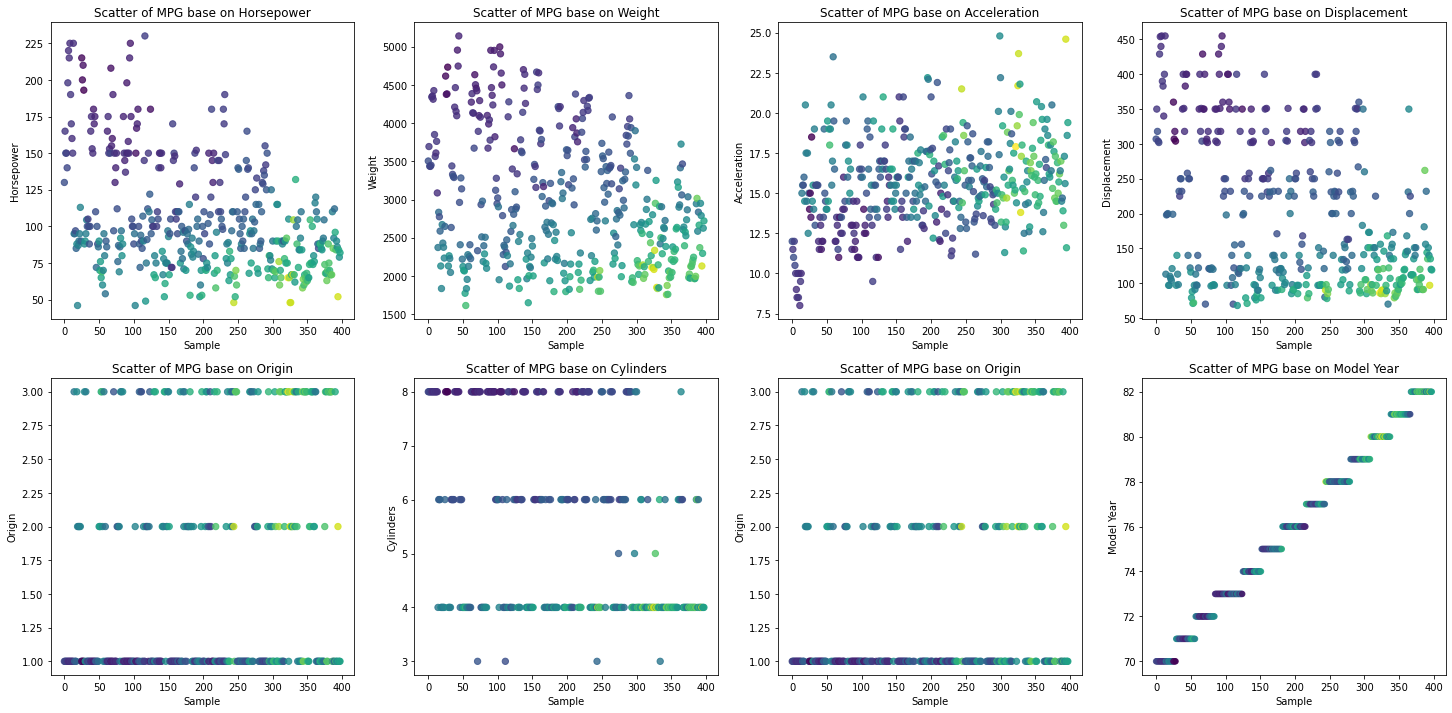

In [ ]:
figs, axs = plt.subplots(2, 4, figsize=(25,12)) # same size plots
axs[0,0].set_xlabel('Sample',size=10);axs[0,0].set_ylabel("Horsepower",size=10)
axs[0,0].set_title('Scatter of MPG base on Horsepower',size=12)
axs[0,0].scatter(x=dataset.index, y=dataset['Horsepower'], c=dataset['MPG']/np.max(dataset['MPG'])*255, alpha=0.8,s=40)


axs[0,1].set_xlabel('Sample',size=10);axs[0,1].set_ylabel("Weight",size=10)
axs[0,1].set_title('Scatter of MPG base on Weight',size=12)
axs[0,1].scatter(x=dataset.index, y=dataset['Weight'], c=dataset['MPG']/np.max(dataset['MPG'])*255, alpha=0.8,s=40)


axs[0,2].set_xlabel('Sample',size=10);axs[0,2].set_ylabel("Acceleration",size=10)
axs[0,2].set_title('Scatter of MPG base on Acceleration',size=12)
axs[0,2].scatter(x=dataset.index, y=dataset['Acceleration'], c=dataset['MPG']/np.max(dataset['MPG'])*255, alpha=0.8,s=40)

axs[0,3].set_xlabel('Sample',size=10);axs[0,3].set_ylabel("Displacement",size=10)
axs[0,3].set_title('Scatter of MPG base on Displacement',size=12)
axs[0,3].scatter(x=dataset.index, y=dataset['Displacement'], c=dataset['MPG']/np.max(dataset['MPG'])*255, alpha=0.8,s=40)

axs[1,0].set_xlabel('Sample',size=10);axs[1,0].set_ylabel("Origin",size=10)
axs[1,0].set_title('Scatter of MPG base on Origin',size=12)
axs[1,0].scatter(x=dataset.index, y=dataset['Origin'], c=dataset['MPG']/np.max(dataset['MPG'])*255, alpha=0.8,s=40)

axs[1,1].set_xlabel('Sample',size=10);axs[1,1].set_ylabel("Cylinders",size=10)
axs[1,1].set_title('Scatter of MPG base on Cylinders',size=12)
axs[1,1].scatter(x=dataset.index, y=dataset['Cylinders'], c=dataset['MPG']/np.max(dataset['MPG'])*255, alpha=0.8,s=40)

axs[1,2].set_xlabel('Sample',size=10);axs[1,2].set_ylabel("Origin",size=10)
axs[1,2].set_title('Scatter of MPG base on Origin',size=12)
axs[1,2].scatter(x=dataset.index, y=dataset['Origin'], c=dataset['MPG']/np.max(dataset['MPG'])*255, alpha=0.8,s=40)

axs[1,3].set_xlabel('Sample',size=10);axs[1,3].set_ylabel("Model Year",size=10)
axs[1,3].set_title('Scatter of MPG base on Model Year',size=12)
axs[1,3].scatter(x=dataset.index, y=dataset['Model Year'], c=dataset['MPG']/np.max(dataset['MPG'])*255, alpha=0.8,s=30)

plt.show()

In [6]:
df = dataset
from sklearn import preprocessing

X = df.drop(['MPG'],axis=1).values   # independant features
y = df[['MPG']].values				# dependant variable


min_max_scaler_x = preprocessing.MinMaxScaler()
normalized_x = min_max_scaler_x.fit_transform(X)
X = pd.DataFrame(normalized_x)

min_max_scaler_y = preprocessing.MinMaxScaler()
normalized_y = min_max_scaler_y.fit_transform(y)
y = pd.DataFrame(normalized_y)

X.insert(0,"MPG",y)

train, validate, test = np.split(X.sample(frac=1), [int(.7*len(X)), int(.8*len(X))])

train =train.to_numpy(dtype = np.float64)
test =test.to_numpy(dtype = np.float64)
validate =validate.to_numpy(dtype = np.float64)

In [7]:
print("Training set is {} %".format(int(train.shape[0]/df.shape[0]*100)))
print("Testing set is {} %".format(int(test.shape[0]/df.shape[0]*100)))
print("Validation set is {} %".format(int(validate.shape[0]/df.shape[0]*100)))

Training set is 69 %
Testing set is 20 %
Validation set is 10 %


# **KNN RBF**

In [ ]:
!git clone https://github.com/PetraVidnerova/rbf_keras.git

Cloning into 'rbf_keras'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 120 (delta 0), reused 1 (delta 0), pack-reused 116
Receiving objects: 100% (120/120), 23.88 KiB | 2.98 MiB/s, done.
Resolving deltas: 100% (66/66), done.


In [ ]:
from keras import layers
from rbf_keras import kmeans_initializer
from rbf_keras import rbflayer
from tensorflow.keras.optimizers import RMSprop

## **5 Neuron**

In [ ]:
rbfLayer = rbflayer.RBFLayer(5,initializer=kmeans_initializer.InitCentersKMeans(train[:,1:8]),
                             betas=4.0,
                             input_shape=(7,))
model = keras.models.Sequential()
model.add(rbfLayer)
model.add(layers.Dense(1))

model.compile(loss='mse',optimizer=RMSprop())

history = model.fit( train[:,1:8],train[:,0], epochs=100,validation_data=(validate[:,1:8],validate[:,0]))

In [ ]:
model.evaluate(test[:,1:8],test[:,0],verbose=2)

3/3 - 0s - loss: 0.0063 - 18ms/epoch - 6ms/step


0.00628955801948905

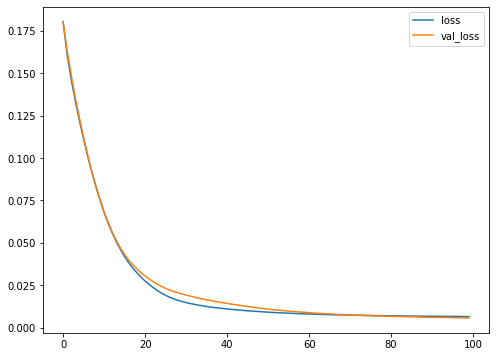

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8,6))
plt.savefig('knn-rbf-5.jpg')
plt.show()

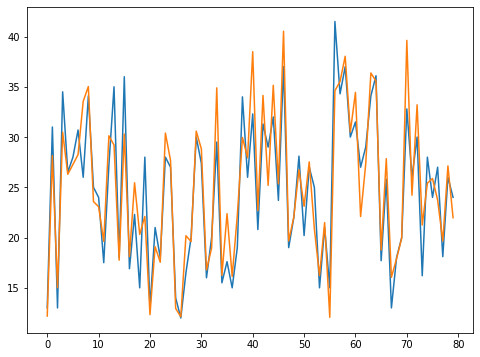

In [ ]:
normalized_pred = model.predict(test[:,1:8])
pred = min_max_scaler_y.inverse_transform(normalized_pred)

y_test = min_max_scaler_y.inverse_transform(test[:,0].reshape(-1, 1))

t=range(len(test))
plt.figure(figsize = (8,6))
plt.plot(t,y_test,t,pred)
plt.show()

# **10 Neuron**

In [ ]:
rbfLayer = rbflayer.RBFLayer(10,initializer=kmeans_initializer.InitCentersKMeans(train[:,1:8]),
                             betas=4.0,
                             input_shape=(7,))
model = keras.models.Sequential()
model.add(rbfLayer)
model.add(layers.Dense(1))

model.compile(loss='mse',optimizer=RMSprop())

history = model.fit( train[:,1:8],train[:,0], epochs=100,validation_data=(validate[:,1:8],validate[:,0]))

In [ ]:
model.evaluate(test[:,1:8],test[:,0],verbose=2)

3/3 - 0s - loss: 0.0051 - 20ms/epoch - 7ms/step


0.005139713641256094

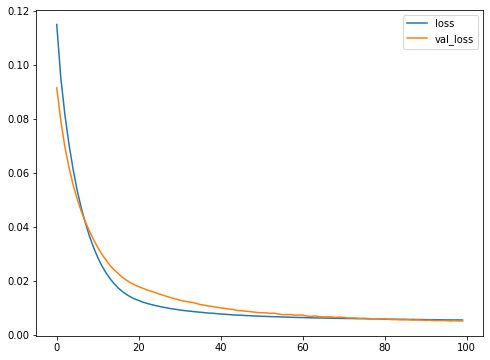

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8,6))
plt.savefig('knn-rbf-10.jpg')
plt.show()

## **50 Neuron**

In [ ]:
rbfLayer = rbflayer.RBFLayer(50,initializer=kmeans_initializer.InitCentersKMeans(train[:,1:8]),
                             betas=4.0,
                             input_shape=(7,))
model = keras.models.Sequential()
model.add(rbfLayer)
model.add(layers.Dense(1))

model.compile(loss='mse',optimizer=RMSprop())

history = model.fit( train[:,1:8],train[:,0], epochs=100,validation_data=(validate[:,1:8],validate[:,0]))

In [ ]:
model.evaluate(test[:,1:8],test[:,0],verbose=2)

3/3 - 0s - loss: 0.0053 - 19ms/epoch - 6ms/step


0.0053091756999492645

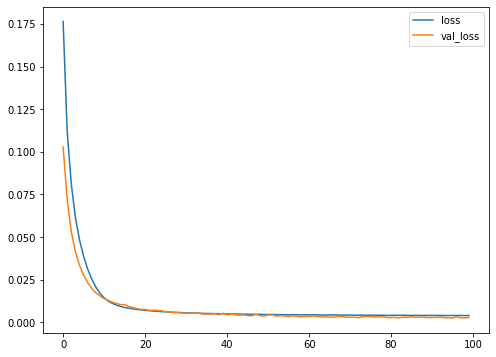

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8,6))
plt.savefig('knn-rbf-50.jpg')
plt.show()

# **100 Neuron**

In [ ]:
rbfLayer = rbflayer.RBFLayer(100,initializer=kmeans_initializer.InitCentersKMeans(train[:,1:8]),
                             betas=4.0,
                             input_shape=(7,))
model = keras.models.Sequential()
model.add(rbfLayer)
model.add(layers.Dense(1))

model.compile(loss='mse',optimizer=RMSprop())

history = model.fit( train[:,1:8],train[:,0], epochs=100,validation_data=(validate[:,1:8],validate[:,0]))

In [ ]:
model.evaluate(test[:,1:8],test[:,0],verbose=2)

3/3 - 0s - loss: 0.0054 - 21ms/epoch - 7ms/step


0.005389073863625526

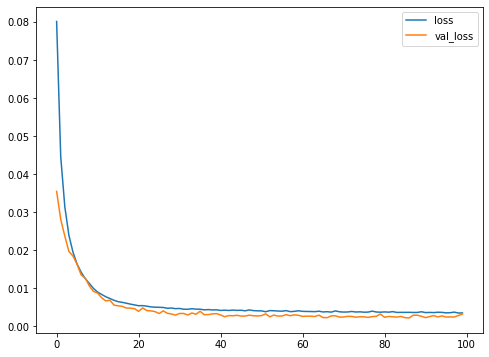

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8,6))
plt.savefig('knn-rbf-100.jpg')
plt.show()

## **150 Neuron**

In [ ]:
rbfLayer = rbflayer.RBFLayer(150,initializer=kmeans_initializer.InitCentersKMeans(train[:,1:8]),
                             betas=4.0,
                             input_shape=(7,))
model = keras.models.Sequential()
model.add(rbfLayer)
model.add(layers.Dense(1))

model.compile(loss='mse',optimizer=RMSprop())

history = model.fit( train[:,1:8],train[:,0], epochs=100,validation_data=(validate[:,1:8],validate[:,0]))

In [ ]:
model.evaluate(test[:,1:8],test[:,0],verbose=2)

3/3 - 0s - loss: 0.0050 - 19ms/epoch - 6ms/step


0.004952462390065193

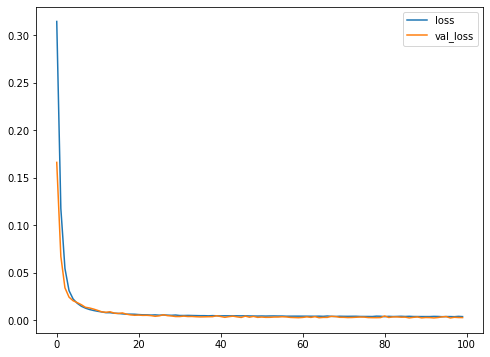

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8,6))
plt.savefig('knn-rbf-150.jpg')
plt.show()

# **MLP**

## **1 Layer**

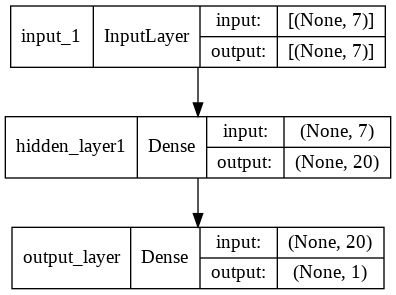

In [9]:
model_1 = keras.models.Sequential([
                                keras.Input(shape=(7)),
                                keras.layers.Dense(units=20,activation="relu",name="hidden_layer" + str(1)),
                                keras.layers.Dense(units=1,name='output_layer')
])
keras.utils.plot_model(model_1,show_shapes=True,expand_nested=True)

In [10]:
model_1.compile(optimizer="adam",loss=keras.losses.mse);
history = model_1.fit(train[:,1:8],train[:,0],epochs=100, validation_data=(validate[:,1:8],validate[:,0]) )

In [ ]:
test_loss =model_1.evaluate(test[:,1:8],test[:,0],verbose=2)      

3/3 - 0s - loss: 0.0051 - 18ms/epoch - 6ms/step


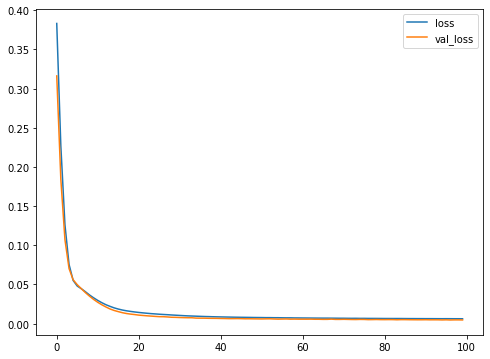

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8,6))
plt.savefig('MLP-1-layer-20-neuron.jpg')
plt.show()

## **2 Layer**

In [ ]:
model_1 = keras.models.Sequential([
                                keras.Input(shape=(7)),
                                keras.layers.Dense(units=20,activation="relu",name="hidden_layer" + str(1)),
                                keras.layers.Dense(units=20,activation="relu",name="hidden_layer" + str(2)),
                                keras.layers.Dense(units=1,name='output_layer')
])
keras.utils.plot_model(model_1,show_shapes=True,expand_nested=True)

model_1.compile(optimizer="adam",loss=keras.losses.mse);
history = model_1.fit(train[:,1:8],train[:,0],epochs=100, validation_data=(validate[:,1:8],validate[:,0]) )



In [ ]:
test_loss =model_1.evaluate(test[:,1:8],test[:,0],verbose=2)      

3/3 - 0s - loss: 0.0051 - 18ms/epoch - 6ms/step


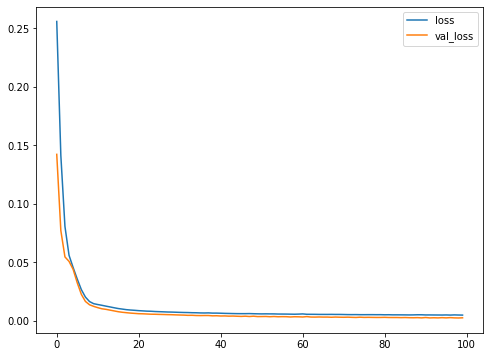

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8,6))
plt.savefig('MLP-2-layer-20-neuron.jpg')
plt.show()

## **3 Layer**

In [ ]:
model_10 = keras.models.Sequential()
model_10.add(keras.Input(shape=(7)))
for i in range(3):
  model_10.add(keras.layers.Dense(units=20,activation="relu",name="hidden_layer" + str(i+1)))
model_10.add(keras.layers.Dense(units=1,name='output_layer'))

keras.utils.plot_model(model_10,show_shapes=True,expand_nested=True)



model_10.compile(optimizer="adam",loss=keras.losses.mse);
history = model_10.fit(train[:,1:8],train[:,0],epochs=100, validation_data=(validate[:,1:8],validate[:,0]) )



In [ ]:
test_loss =model_10.evaluate(test[:,1:8],test[:,0],verbose=2)      

3/3 - 0s - loss: 0.0049 - 20ms/epoch - 7ms/step


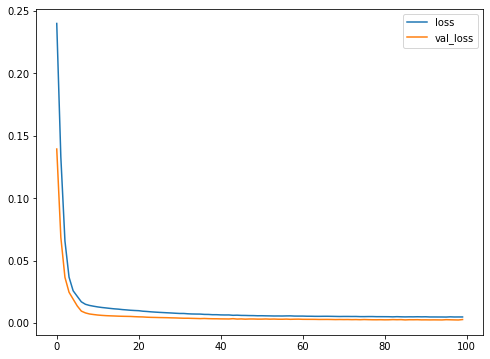

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8,6))
plt.savefig('MLP-3-layer-20-neuron.jpg')
plt.show()

## **5 Layer**

In [ ]:
model_10 = keras.models.Sequential()
model_10.add(keras.Input(shape=(7)))
for i in range(5):
  model_10.add(keras.layers.Dense(units=20,activation="relu",name="hidden_layer" + str(i+1)))
model_10.add(keras.layers.Dense(units=1,name='output_layer'))

keras.utils.plot_model(model_10,show_shapes=True,expand_nested=True)



model_10.compile(optimizer="adam",loss=keras.losses.mse);
history = model_10.fit(train[:,1:8],train[:,0],epochs=100, validation_data=(validate[:,1:8],validate[:,0]) )



In [ ]:
test_loss =model_10.evaluate(test[:,1:8],test[:,0],verbose=2)      

3/3 - 0s - loss: 0.0052 - 19ms/epoch - 6ms/step


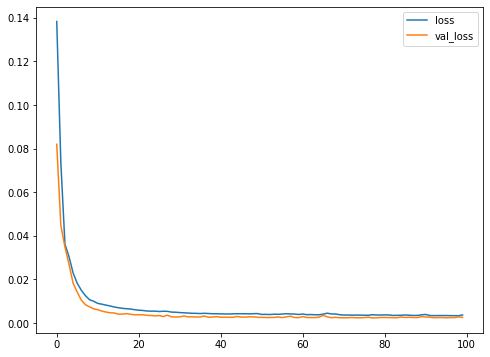

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8,6))
plt.savefig('MLP-5-layer-20-neuron.jpg')
plt.show()

# **10 Layer**

In [ ]:
model_10 = keras.models.Sequential()
model_10.add(keras.Input(shape=(7)))
for i in range(10):
  model_10.add(keras.layers.Dense(units=20,activation="relu",name="hidden_layer" + str(i+1)))
model_10.add(keras.layers.Dense(units=1,name='output_layer'))

keras.utils.plot_model(model_10,show_shapes=True,expand_nested=True)



model_10.compile(optimizer="adam",loss=keras.losses.mse);
history = model_10.fit(train[:,1:8],train[:,0],epochs=100, validation_data=(validate[:,1:8],validate[:,0]) )



In [ ]:
test_loss =model_10.evaluate(test[:,1:8],test[:,0],verbose=2)      

3/3 - 0s - loss: 0.0049 - 22ms/epoch - 7ms/step


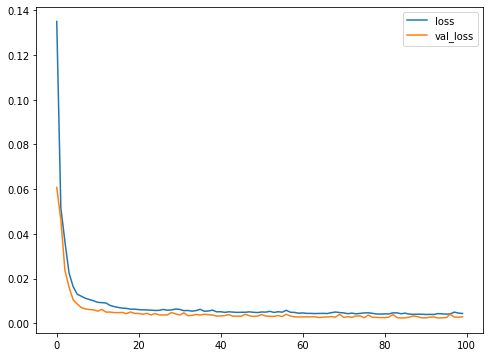

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8,6))
plt.savefig('MLP-10-layer-20-neuron.jpg')
plt.show()

## **50 Layer**

In [ ]:
model_10 = keras.models.Sequential()
model_10.add(keras.Input(shape=(7)))
for i in range(50):
  model_10.add(keras.layers.Dense(units=20,activation="relu",name="hidden_layer" + str(i+1)))
model_10.add(keras.layers.Dense(units=1,name='output_layer'))

keras.utils.plot_model(model_10,show_shapes=True,expand_nested=True)



model_10.compile(optimizer="adam",loss=keras.losses.mse);
history = model_10.fit(train[:,1:8],train[:,0],epochs=100, validation_data=(validate[:,1:8],validate[:,0]) )



In [ ]:
test_loss =model_10.evaluate(test[:,1:8],test[:,0],verbose=2)      

3/3 - 0s - loss: 0.0372 - 21ms/epoch - 7ms/step


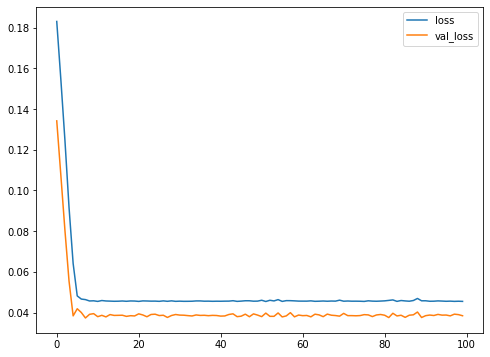

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8,6))
plt.savefig('MLP-50-layer-20-neuron.jpg')
plt.show()

## **100 Layer**

In [ ]:
model_10 = keras.models.Sequential()
model_10.add(keras.Input(shape=(7)))
for i in range(100):
  model_10.add(keras.layers.Dense(units=20,activation="relu",name="hidden_layer" + str(i+1)))
model_10.add(keras.layers.Dense(units=1,name='output_layer'))

keras.utils.plot_model(model_10,show_shapes=True,expand_nested=True)



model_10.compile(optimizer="adam",loss=keras.losses.mse);
history = model_10.fit(train[:,1:8],train[:,0],epochs=100, validation_data=(validate[:,1:8],validate[:,0]) )



In [ ]:
test_loss =model_10.evaluate(test[:,1:8],test[:,0],verbose=2)      

3/3 - 0s - loss: 0.0368 - 26ms/epoch - 9ms/step


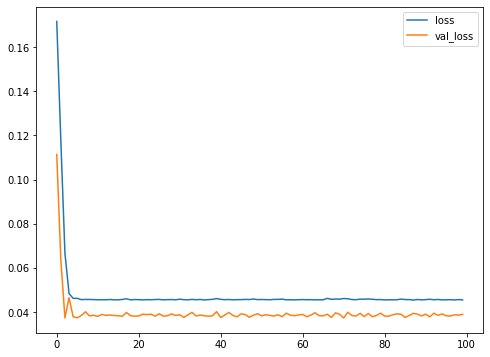

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8,6))
plt.savefig('MLP-100-layer-20-neuron.jpg')
plt.show()

## **The best MLP architecture has 3 layers**

# **MLP Neuron**

## **5 Neuron**

In [ ]:
model_10 = keras.models.Sequential()
model_10.add(keras.Input(shape=(7)))
for i in range(3):
  model_10.add(keras.layers.Dense(units=5,activation="relu",name="hidden_layer" + str(i+1)))
model_10.add(keras.layers.Dense(units=1,name='output_layer'))

keras.utils.plot_model(model_10,show_shapes=True,expand_nested=True)



model_10.compile(optimizer="adam",loss=keras.losses.mse);
history = model_10.fit(train[:,1:8],train[:,0],epochs=100, validation_data=(validate[:,1:8],validate[:,0]) )



In [12]:
test_loss =model_10.evaluate(test[:,1:8],test[:,0],verbose=2)      

3/3 - 0s - loss: 0.0051 - 30ms/epoch - 10ms/step


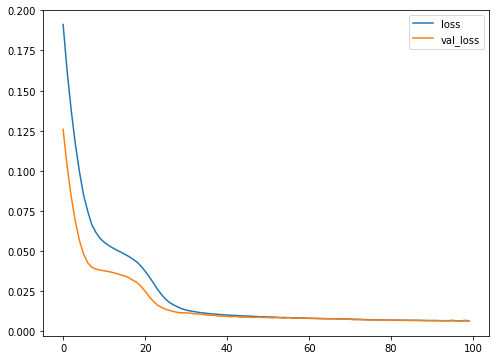

In [13]:
pd.DataFrame(history.history).plot(figsize = (8,6))
plt.savefig('MLP-3-layer-5-neuron.jpg')
plt.show()

## **10 Neuron**

In [14]:
model_10 = keras.models.Sequential()
model_10.add(keras.Input(shape=(7)))
for i in range(3):
  model_10.add(keras.layers.Dense(units=10,activation="relu",name="hidden_layer" + str(i+1)))
model_10.add(keras.layers.Dense(units=1,name='output_layer'))

keras.utils.plot_model(model_10,show_shapes=True,expand_nested=True)



model_10.compile(optimizer="adam",loss=keras.losses.mse);
history = model_10.fit(train[:,1:8],train[:,0],epochs=100, validation_data=(validate[:,1:8],validate[:,0]) )



In [15]:
test_loss =model_10.evaluate(test[:,1:8],test[:,0],verbose=2)      

3/3 - 0s - loss: 0.0055 - 19ms/epoch - 6ms/step


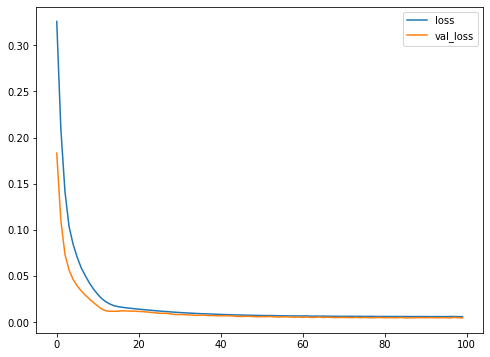

In [16]:
pd.DataFrame(history.history).plot(figsize = (8,6))
plt.savefig('MLP-3-layer-10-neuron.jpg')
plt.show()

## **50 Neuron**

In [17]:
model_10 = keras.models.Sequential()
model_10.add(keras.Input(shape=(7)))
for i in range(3):
  model_10.add(keras.layers.Dense(units=50,activation="relu",name="hidden_layer" + str(i+1)))
model_10.add(keras.layers.Dense(units=1,name='output_layer'))

keras.utils.plot_model(model_10,show_shapes=True,expand_nested=True)



model_10.compile(optimizer="adam",loss=keras.losses.mse);
history = model_10.fit(train[:,1:8],train[:,0],epochs=100, validation_data=(validate[:,1:8],validate[:,0]) )

In [18]:
test_loss =model_10.evaluate(test[:,1:8],test[:,0],verbose=2)      

3/3 - 0s - loss: 0.0041 - 18ms/epoch - 6ms/step


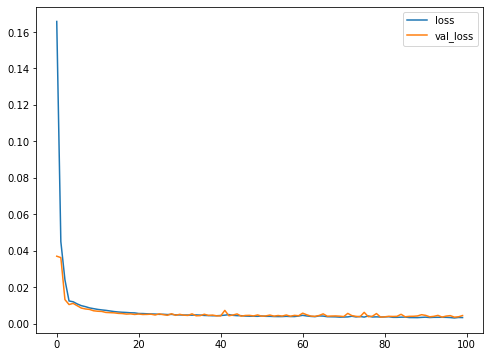

In [19]:
pd.DataFrame(history.history).plot(figsize = (8,6))
plt.savefig('MLP-3-layer-50-neuron.jpg')
plt.show()

## **100 Neuron**

In [ ]:
model_10 = keras.models.Sequential()
model_10.add(keras.Input(shape=(7)))
for i in range(3):
  model_10.add(keras.layers.Dense(units=100,activation="relu",name="hidden_layer" + str(i+1)))
model_10.add(keras.layers.Dense(units=1,name='output_layer'))

keras.utils.plot_model(model_10,show_shapes=True,expand_nested=True)



model_10.compile(optimizer="adam",loss=keras.losses.mse);
history = model_10.fit(train[:,1:8],train[:,0],epochs=100, validation_data=(validate[:,1:8],validate[:,0]) )

In [21]:
test_loss =model_10.evaluate(test[:,1:8],test[:,0],verbose=2)      

3/3 - 0s - loss: 0.0048 - 19ms/epoch - 6ms/step


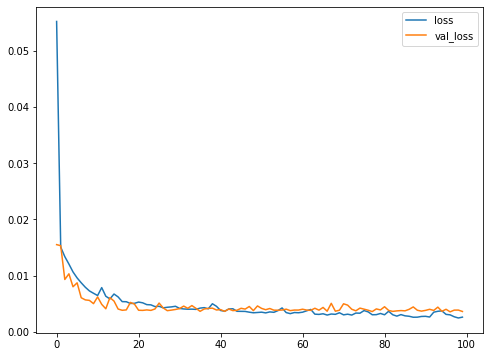

In [22]:
pd.DataFrame(history.history).plot(figsize = (8,6))
plt.savefig('MLP-3-layer-100-neuron.jpg')
plt.show()

## **150 Neuron**

In [23]:
model_10 = keras.models.Sequential()
model_10.add(keras.Input(shape=(7)))
for i in range(3):
  model_10.add(keras.layers.Dense(units=150,activation="relu",name="hidden_layer" + str(i+1)))
model_10.add(keras.layers.Dense(units=1,name='output_layer'))

keras.utils.plot_model(model_10,show_shapes=True,expand_nested=True)



model_10.compile(optimizer="adam",loss=keras.losses.mse);
history = model_10.fit(train[:,1:8],train[:,0],epochs=100, validation_data=(validate[:,1:8],validate[:,0]) )

In [24]:
test_loss =model_10.evaluate(test[:,1:8],test[:,0],verbose=2)      

3/3 - 0s - loss: 0.0058 - 21ms/epoch - 7ms/step


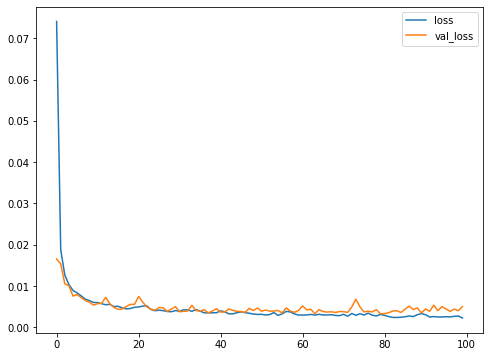

In [25]:
pd.DataFrame(history.history).plot(figsize = (8,6))
plt.savefig('MLP-3-layer-150-neuron.jpg')
plt.show()

# **Learning Rate**

# **1e-4**

In [ ]:
model_10 = keras.models.Sequential()
model_10.add(keras.Input(shape=(7)))
for i in range(3):
  model_10.add(keras.layers.Dense(units=50,activation="relu",name="hidden_layer" + str(i+1)))
model_10.add(keras.layers.Dense(units=1,name='output_layer'))

keras.utils.plot_model(model_10,show_shapes=True,expand_nested=True)



model_10.compile(optimizer=keras.optimizers.Adam(lr=0.0001) ,loss=keras.losses.mse);
history = model_10.fit(train[:,1:8],train[:,0],epochs=100, validation_data=(validate[:,1:8],validate[:,0]) )

In [27]:
test_loss =model_10.evaluate(test[:,1:8],test[:,0],verbose=2)      

3/3 - 0s - loss: 0.0067 - 20ms/epoch - 7ms/step


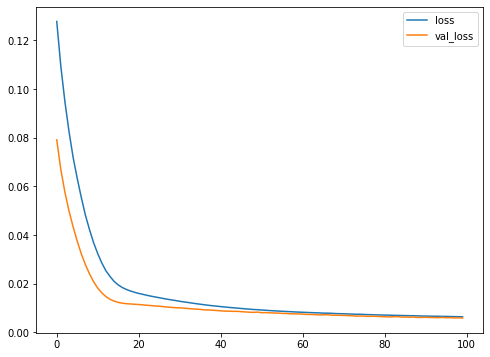

In [28]:
pd.DataFrame(history.history).plot(figsize = (8,6))
plt.savefig('MLP-3-layer-50-neuron-1e-4.jpg')
plt.show()

## **1e-3**

In [ ]:
model_10 = keras.models.Sequential()
model_10.add(keras.Input(shape=(7)))
for i in range(3):
  model_10.add(keras.layers.Dense(units=50,activation="relu",name="hidden_layer" + str(i+1)))
model_10.add(keras.layers.Dense(units=1,name='output_layer'))

keras.utils.plot_model(model_10,show_shapes=True,expand_nested=True)



model_10.compile(optimizer=keras.optimizers.Adam(lr=0.001) ,loss=keras.losses.mse);
history = model_10.fit(train[:,1:8],train[:,0],epochs=100, validation_data=(validate[:,1:8],validate[:,0]) )

In [30]:
test_loss =model_10.evaluate(test[:,1:8],test[:,0],verbose=2)      

3/3 - 0s - loss: 0.0040 - 19ms/epoch - 6ms/step


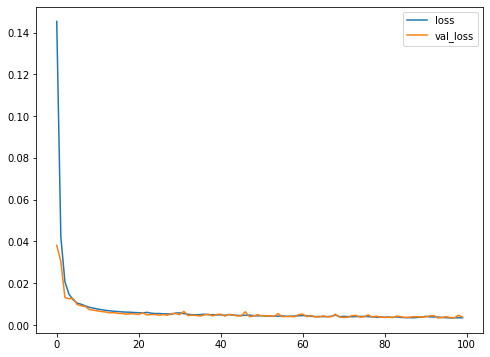

In [31]:
pd.DataFrame(history.history).plot(figsize = (8,6))
plt.savefig('MLP-3-layer-50-neuron-1e-3.jpg')
plt.show()

## **1e-2**

In [ ]:
model_10 = keras.models.Sequential()
model_10.add(keras.Input(shape=(7)))
for i in range(3):
  model_10.add(keras.layers.Dense(units=50,activation="relu",name="hidden_layer" + str(i+1)))
model_10.add(keras.layers.Dense(units=1,name='output_layer'))

keras.utils.plot_model(model_10,show_shapes=True,expand_nested=True)



model_10.compile(optimizer=keras.optimizers.Adam(lr=0.01) ,loss=keras.losses.mse);
history = model_10.fit(train[:,1:8],train[:,0],epochs=100, validation_data=(validate[:,1:8],validate[:,0]) )

In [33]:
test_loss =model_10.evaluate(test[:,1:8],test[:,0],verbose=2)      

3/3 - 0s - loss: 0.0052 - 23ms/epoch - 8ms/step


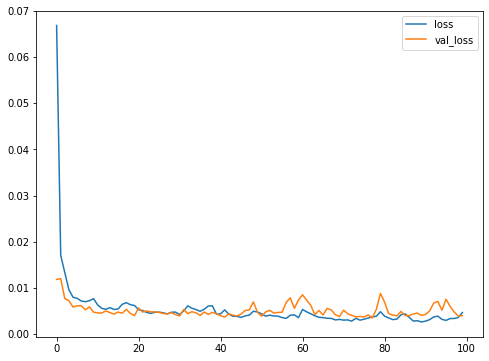

In [34]:
pd.DataFrame(history.history).plot(figsize = (8,6))
plt.savefig('MLP-3-layer-50-neuron-1e-2.jpg')
plt.show()

## **1e-1**

In [35]:
model_10 = keras.models.Sequential()
model_10.add(keras.Input(shape=(7)))
for i in range(3):
  model_10.add(keras.layers.Dense(units=50,activation="relu",name="hidden_layer" + str(i+1)))
model_10.add(keras.layers.Dense(units=1,name='output_layer'))

keras.utils.plot_model(model_10,show_shapes=True,expand_nested=True)



model_10.compile(optimizer=keras.optimizers.Adam(lr=0.1) ,loss=keras.losses.mse);
history = model_10.fit(train[:,1:8],train[:,0],epochs=100, validation_data=(validate[:,1:8],validate[:,0]) )

9/9 [==============================] - 0s 5ms/step - loss: 0.0071 - val_loss: 0.0047


In [36]:
test_loss =model_10.evaluate(test[:,1:8],test[:,0],verbose=2)      

3/3 - 0s - loss: 0.0048 - 21ms/epoch - 7ms/step


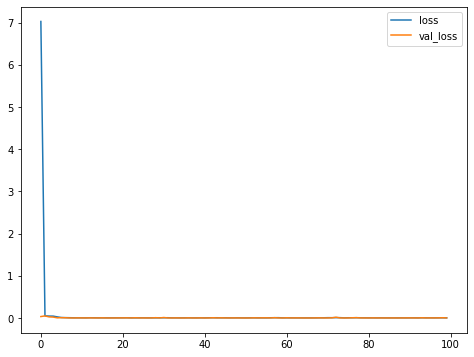

In [37]:
pd.DataFrame(history.history).plot(figsize = (8,6))
plt.savefig('MLP-3-layer-50-neuron-1e-1.jpg')
plt.show()

## **9e-1**

In [38]:
model_10 = keras.models.Sequential()
model_10.add(keras.Input(shape=(7)))
for i in range(3):
  model_10.add(keras.layers.Dense(units=50,activation="relu",name="hidden_layer" + str(i+1)))
model_10.add(keras.layers.Dense(units=1,name='output_layer'))

keras.utils.plot_model(model_10,show_shapes=True,expand_nested=True)



model_10.compile(optimizer=keras.optimizers.Adam(lr=0.9) ,loss=keras.losses.mse);
history = model_10.fit(train[:,1:8],train[:,0],epochs=100, validation_data=(validate[:,1:8],validate[:,0]) )

In [39]:
test_loss =model_10.evaluate(test[:,1:8],test[:,0],verbose=2)      

3/3 - 0s - loss: 0.1454 - 20ms/epoch - 7ms/step


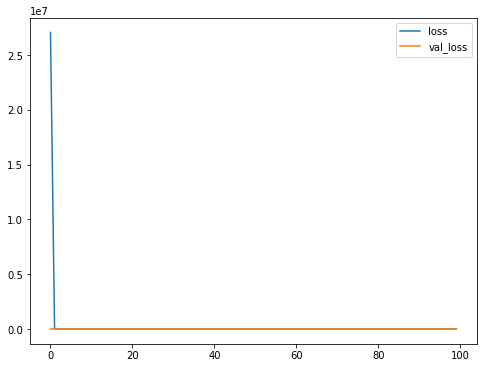

In [40]:
pd.DataFrame(history.history).plot(figsize = (8,6))
plt.savefig('MLP-3-layer-50-neuron-9e-1.jpg')
plt.show()

## **1**

In [41]:
model_10 = keras.models.Sequential()
model_10.add(keras.Input(shape=(7)))
for i in range(3):
  model_10.add(keras.layers.Dense(units=50,activation="relu",name="hidden_layer" + str(i+1)))
model_10.add(keras.layers.Dense(units=1,name='output_layer'))

keras.utils.plot_model(model_10,show_shapes=True,expand_nested=True)



model_10.compile(optimizer=keras.optimizers.Adam(lr=1) ,loss=keras.losses.mse);
history = model_10.fit(train[:,1:8],train[:,0],epochs=100, validation_data=(validate[:,1:8],validate[:,0]) )

In [42]:
test_loss =model_10.evaluate(test[:,1:8],test[:,0],verbose=2)      

3/3 - 0s - loss: 0.5369 - 18ms/epoch - 6ms/step


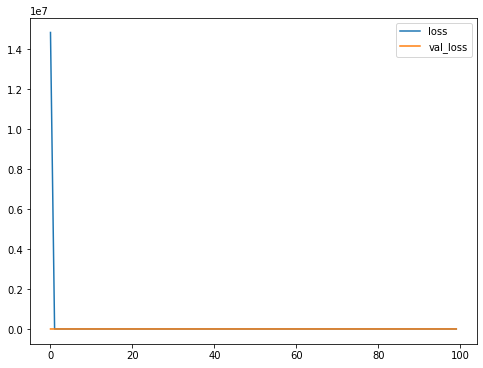

In [43]:
pd.DataFrame(history.history).plot(figsize = (8,6))
plt.savefig('MLP-3-layer-50-neuron-1.jpg')
plt.show()